# Problem Set 5

## Trees, Bagging and RandomForest

### Prem Shah

### INFX 574

This problem set uses the Titanic Dataset and the below, we see the description of the attributes.


* a) **survived** - categorical variable if a person survived or not (1 - survived, 0 - did not survive).
* b) **pclass** - ticket class of passenger (1 = 1st, 2= 2nd or 3 = 3rd)
* c) **sex** - gender of passenger.
* d) **age** - age in years.
* e) **sibsp** - number of siblings/spouses aboard the titanic.
* f) **parch** - number of parents/children aboard the titanic.
* g) **ticket** - ticket number of the passenger.
* h) **fare** - passenger fare.
* i) **cabin** - cabin number.
* j) **embarked** - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* k) **boat** - on which boat.
* l) **body** - ________.
* m) **fare** - passenger fare.

### Collaborated with: Manasi Kulkarni, Aditya Wakade, Pratik Damania, Gaurav Gohil

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt

In [2]:
# Importing the data
data = pd.read_csv('titanic.csv')
data['sex'] = np.where(data.sex == 'female', 1, 0)

# Making a family siz by adding the columns parch and sibsp. And then classifying
data['family size'] = data.parch + data.sibsp
data['family class'] =  np.where(data['family size'].isin([0]), 'single', np.where(data['family size'].isin([1,2]), 'small', np.where(data['family size'].isin([3,4,5]), 'medium', 'large')))

(array([ 35.,   0.,   0.,  90.,   0.,   0., 790.,   0.,   0., 394.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

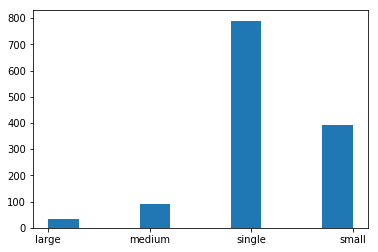

In [3]:
plt.hist(data['family class'])

As we can see, single and small families account for the largest passengers.

In [4]:
# Splitting the data in survived and not survived
sur = data[data.survived == 1]
n_sur = data[data.survived == 0]

In [5]:
# Finding null values for every column
nulls = data.isnull().sum()
nl = nulls[[0,1,3,4,5,6,8,12]]
nl

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
fare           1
body        1188
dtype: int64

In [6]:
# Finding mean, max and min for survived
x1 = sur.describe().T[['mean', 'min', 'max']]
x1.columns = ['survived_average', 'survived_min', 'survived_max']

In [7]:
# Finding mean, max and min for not survived
x2 = n_sur.describe().T[['mean', 'min', 'max']]
x2.columns = ['not survived_average', 'not survived_min', 'not survived_max']

In [8]:

sum_data = pd.DataFrame(list(zip(sur.mean(),n_sur.mean(),nl)))
sum_data.columns = ['survived_average', 'not survived_average', 'nulls']
sum_data.index = ['pclass', 'survived', 'sex','age', 'sibsp', 'parch', 'fare', 'body']
sum_data

,survived_average,not survived_average,nulls
pclass,1.962000,2.500618,0
survived,1.000000,0.000000,0
sex,0.678000,0.156984,0
age,28.918228,30.545369,263
sibsp,0.462000,0.521632,0
parch,0.476000,0.328801,0
fare,49.361184,23.353831,1
body,NaN,160.809917,1188


Now we join the datasets to find average and min max values for survived, not survived along with null values

In [9]:
temp = pd.merge(sum_data, x1, on = 'survived_average')
final = pd.merge(temp, x2, on = 'not survived_average')
final.index = ['pclass', 'survived','sex', 'age', 'sibsp', 'parch', 'fare', 'body']
final

,survived_average,not survived_average,nulls,survived_min,survived_max,not survived_min,not survived_max
pclass,1.962000,2.500618,0,1.0000,3.0000,1.0000,3.0
survived,1.000000,0.000000,0,1.0000,1.0000,0.0000,0.0
sex,0.678000,0.156984,0,0.0000,1.0000,0.0000,1.0
age,28.918228,30.545369,263,0.1667,80.0000,0.3333,74.0
sibsp,0.462000,0.521632,0,0.0000,4.0000,0.0000,8.0
parch,0.476000,0.328801,0,0.0000,5.0000,0.0000,9.0
fare,49.361184,23.353831,1,0.0000,512.3292,0.0000,263.0
body,NaN,160.809917,1188,NaN,NaN,1.0000,328.0


Analysis: We can see that the average values of pclass is slightly less than class 2 whie for not survived it is tending towards class 3 from class 2. Hence we can estimate that 2nd and 3rd class people did not survive as much as 1st class people.
On an average it seems like slightly more younger people survived but the range for not survived is smaller and spans till 74. Age has a lot of null values so we cannot be sure about its results.

Also, a higher proportion of parents and children who survived had relatively smaller familites than the ones who did not survive.

Lastly, we can say that much more women survived over men based on the average values.

Text(0,0.5,'Number of people')

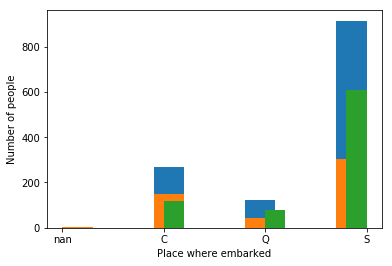

In [10]:
fig, ax = plt.subplots()
ax.hist(data['embarked']) # Blue
ax.hist(sur['embarked'])  # Orange
ax.hist(n_sur['embarked']) # Green
plt.xlabel('Place where embarked')
plt.ylabel('Number of people')

This type of analysis shows us the total number of people from each port (Blue), Number of survivors (Orange) and number of non survivor (Green). We can see that majority of the people embarked at Southampton and had the relatively least survivors. Cherbourg is the only place which has more survivors than not survivors. There might be some reasoning behind the demographic of Cherbourg either about 1st class higher population or women.

In [11]:
# Subsetting the data for including only ordinal and categorical variables which show strong differences between survived and not survived
dt_data = data[['pclass', 'sex','age', 'family class', 'embarked', 'survived']]

In [12]:
dt_test = data.sample(frac = 0.25)
dt_train = data.drop(dt_test.index)

Now we make a function that 
1. Calculates entropy for 2 given sums
2. Calculates the information gain of a column as compared to target variable
3. Returns a Decision tree when a dataset and target is given as input

In [13]:
def entropy_finder(x,y):
    sum = x + y
    if(x==0 or y==0):
        entropy = 0
    else:
        entropy = -(x/sum)*np.log2(x/sum) - (y/sum)*np.log2(y/sum)
    return(entropy)

In [14]:
# Finding the entropy of the target variable in the training data
entropy_target = entropy_finder(len(dt_train[dt_train['survived'] == 1]), len(dt_train[dt_train['survived'] == 0]))
print('entropy of survived in training data',entropy_target)

entropy of survived in training data 0.959354634665085


In [15]:
# MAKING a function for finding entropy and information gain
def col_entropy_finder(col_tar_data, col_name):
    res = pd.DataFrame(columns = ['value', 'entropy', 'weight'])
    len_tot = len(col_tar_data)
    ig = 0
    for elem in col_tar_data[col_name].unique():
        x = col_tar_data[col_tar_data[col_name] == elem]
        col_weight = len(x)
        e1 = len(x[x['survived'] == 1])
        e2 = len(x[x['survived'] == 0])
        entr = entropy_finder(e1, e2)
        idx = len(res) + 1
        res.loc[idx] = [elem,entr,col_weight]
        ig = ig + (entr*col_weight/len_tot)
    
    return(res,ig)

In [16]:
f, col_entr = col_entropy_finder(data, 'pclass')
print(f)
print("column entropy is", col_entr)

   value   entropy  weight
1    1.0  0.958609   323.0
2    2.0  0.985653   277.0
3    3.0  0.819554   709.0
column entropy is 0.8890147580167741


### Finding an optimal value for splitting age 

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

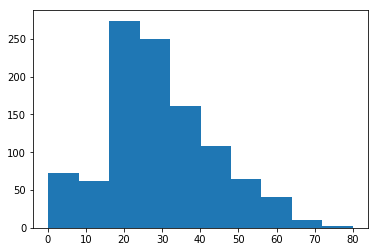

In [17]:
plt.hist(data.age.dropna())

We can see that average age is around thirty. With a median of 40 years. As seen in the histogram, the most frequent age value lies somewhere near 30. We can either drop the NAN values or assign all of them to the mean value 30 to ensure a similar distribution. We drop all the NAN age values and then make a set of unique values.

In [18]:
# We drop all NaN values for age and embarked
data_new = data.drop(index = data[data['age'] == float('nan')].index)
data_new = data.drop(index = data[data['age'].isnull() == True].index)

data_new = data.drop(index = data[data['embarked'] == float('nan')].index)
data_new = data.drop(index = data[data['embarked'].isnull() == True].index)

In [19]:
# Redefining test train for combined analysis
dt_test = data_new.iloc[0:300]
dt_train = data_new.drop(index = dt_test.index)

Finding entropy of a column age

In [20]:
# Making an empty dataframe for storing the emtropy values for every splitting value of age
age_entropy  = pd.DataFrame(columns = ['age', 'entropy'])
# Dropping the NAN rows from training data
for elem in dt_train['age'].unique():
    # Splitting age according to threshold in this iteration
    dt_train['age class'] = np.where(dt_train['age'] > elem, 1,0)
    # Finding entropy of age column
    f, en = col_entropy_finder(dt_train, 'age class')
    idx = len(age_entropy) + 1
    age_entropy.loc[idx] = [elem, en]

age_entropy.nsmallest(10, columns = 'entropy')

,age,entropy
62,36.5000,0.886966
15,36.0000,0.887311
20,34.0000,0.887564
73,0.3333,0.887750
37,37.0000,0.887764
42,38.0000,0.887887
74,0.1667,0.887913
79,34.5000,0.887918
51,33.0000,0.888051
59,32.5000,0.888069


Hence, when we split the root node using age divided over a threshold, at threshold age = 15 we get the lowest entropy. However, we dont know if this will be the best choice of a root node, we continue this kind of analysis to find a maximum information gain for a threshold for a given column 

In [21]:
# Consider column pclass
# Making an empty dataframe for storing the emtropy values for every splitting value of
pclass_entropy  = pd.DataFrame(columns = ['pclass', 'entropy'])
# Dropping the NAN rows from training data
for elem in dt_train['pclass'].unique():
    # Splitting age according to threshold in this iteration
    dt_train['pclass class'] = np.where(dt_train['pclass'] > elem, 1,0)
    # Finding entropy of age column
    f, en = col_entropy_finder(dt_train, 'pclass class')
    idx = len(pclass_entropy) + 1
    pclass_entropy.loc[idx] = [elem, en]

pclass_entropy.nsmallest(10, columns = 'entropy')

,pclass,entropy
2,2.0,0.869473
1,1.0,0.888770
3,3.0,0.891828


We can see that for pclass, the entropy was much smaller than age, so that is probably a better column to start as a root. Now we create a loop to run this analysis for all columns except age, considered for the training data.

Now we create an analysis for all the possible column values and their thresholds to determine which combination would be the best for splitting the root

In [22]:
data_new.embarked[1]

'S'

In [23]:
# Converting all categorical values into ordinal values

# Family class
data_new['family class'] = np.where(data_new['family class'] == 'single', 0, np.where(data_new['family class'] == 'small',1, np.where(data_new['family class'] == 'medium', 2, 3)))
data_new['embarked'] = np.where(data_new['embarked'] =='Q', 0, np.where(data_new['embarked'] =='C',1,2))

In [24]:
# Redefining test train for combined analysis
dt_test = data_new.iloc[0:300]
dt_train = data_new.drop(index = dt_test.index)

In [27]:
dt_train['age'].unique()

array([35.    , 64.    , 60.    , 54.    , 21.    , 55.    , 31.    ,
       57.    , 45.    , 50.    , 27.    , 51.    ,     nan, 62.    ,
       36.    , 30.    , 28.    , 18.    , 25.    , 34.    , 23.    ,
       32.    , 19.    ,  1.    ,  4.    , 12.    , 26.    , 42.    ,
       24.    , 15.    , 40.    , 20.    ,  0.8333, 22.    , 44.    ,
       52.    , 37.    , 29.    ,  8.    , 48.    , 17.    , 38.    ,
       16.    , 47.    ,  0.6667,  6.    ,  7.    , 43.    , 49.    ,
       63.    , 33.    ,  3.    , 61.    , 46.    , 13.    , 41.    ,
       39.    , 70.    , 32.5   , 14.    ,  2.    , 36.5   , 59.    ,
       18.5   ,  0.9167,  5.    , 66.    ,  9.    , 11.    ,  0.75  ,
       70.5   , 22.5   ,  0.3333,  0.1667, 65.    , 40.5   , 10.    ,
       23.5   , 34.5   , 20.5   , 30.5   , 55.5   , 28.5   , 38.5   ,
       14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   , 45.5   ,
       26.5   ])

In [26]:
cols = ['pclass', 'sex','age', 'family class', 'embarked']


# Making an empty dataframe for storing the emtropy values for every splitting value of a given column
result_entropy  = pd.DataFrame(columns = ['split_value', 'entropy', 'column'])
for col in cols:
        # Unique values
        for elem in dt_train[col].unique():
            # Splitting age according to threshold in this iteration
            dt_train['class'] = np.where(dt_train[col] > elem, 1,0)
            # Finding entropy of current column
            f, en = col_entropy_finder(dt_train, 'class')
            idx = len(result_entropy) + 1
            result_entropy.loc[idx] = [elem, en, col]

result_entropy.nsmallest(10, columns = 'entropy')

,split_value,entropy,column
5,0,0.722999,sex
2,2,0.869473,pclass
98,0,0.875141,family class
102,1,0.883848,embarked
100,2,0.886350,family class
67,36.5,0.886966,age
20,36,0.887311,age
25,34,0.887564,age
78,0.3333,0.887750,age
42,37,0.887764,age
